# <span style=color:orange;>HW Musical Note Frequency Visualization

## Step1 导入所需库

In [5]:
%matplotlib inline
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
print('库导入成功！')

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

库导入成功！


## Step2 生成乐音及频率

In [ ]:
# 遍历八度和12个音，生成音名并计算频率，筛选人耳可听范围。
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
octaves = list(range(1, 9))
note_names = []
frequencies = []
octave_map = []
for octave in octaves:
    for note in notes:
        name = f'{note}{octave}'
        freq = librosa.note_to_hz(name)
        if 20 <= freq <= 20000:
            note_names.append(name)
            frequencies.append(freq)
            octave_map.append(octave)
            
# 按频率排序
sorted_idx = np.argsort(frequencies)
note_names = [note_names[i] for i in sorted_idx]
frequencies = [frequencies[i] for i in sorted_idx]
octave_map = [octave_map[i] for i in sorted_idx]

## Step3 数据分组与颜色映射

In [9]:
# 为不同八度分配颜色，准备绘图数据。
octave_set = sorted(set(octave_map))
palette = sns.color_palette('hsv', len(octave_set))
octave_colors = {octave: palette[i] for i, octave in enumerate(octave_set)}

## Step4 可视化

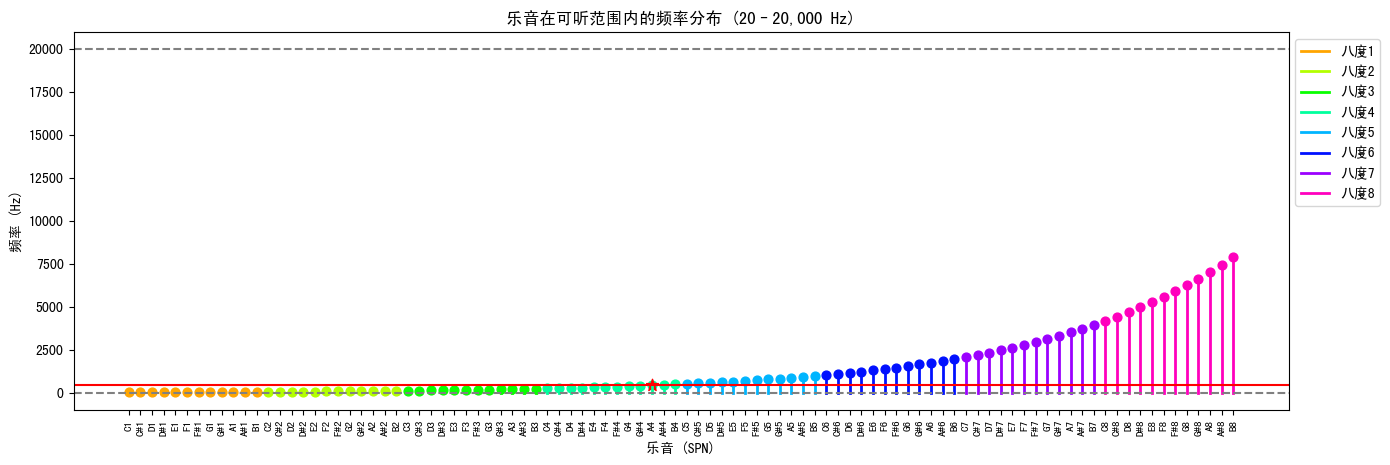

In [ ]:
# 绘制乐音频率分布图，标注人耳范围和标准音高。
plt.figure(figsize=(18, 6))
for i, (name, freq, octave) in enumerate(zip(note_names, frequencies, octave_map)):
    color = octave_colors[octave]
    plt.plot([i, i], [0, freq], color=color, linewidth=2)
    plt.scatter(i, freq, color=color, s=40)

# 标注人耳可听范围
plt.axhline(20, color='gray', linestyle='--', label='人耳下限 20Hz')
plt.axhline(20000, color='gray', linestyle='--', label='人耳上限 20000Hz')
# 标注A4=440Hz
a4_idx = note_names.index('A4') if 'A4' in note_names else None
if a4_idx is not None:
    plt.axhline(440, color='red', linestyle='-', label='标准音高 A4=440Hz')
    plt.scatter(a4_idx, 440, color='red', s=80, marker='*')

# 坐标轴与标题
plt.title('乐音在可听范围内的频率分布 (20–20,000 Hz)')
plt.xlabel('乐音 (SPN)')
plt.ylabel('频率 (Hz)')
plt.xticks(range(len(note_names)), note_names, rotation=90, fontsize=8)

# 八度图例
handles = [plt.Line2D([0], [0], color=octave_colors[o], lw=2) for o in octave_set]
labels = [f'八度{o}' for o in octave_set]
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(bottom=0.25, right=0.8)
plt.show()

# 乐音频率可视化作业学习心得

本次作业让我深入理解了科学音高记谱（SPN）、乐音频率计算以及数据可视化的实际应用。通过编程实现乐音频率的生成与分组，并用 matplotlib 绘制频率分布图，我收获颇丰。

## 主要收获

1. **掌握了乐音频率计算方法**  
   通过 librosa.note_to_hz()，能够将 SPN 格式的音名快速转换为实际频率，理解了十二平均律下各音的频率关系。

2. **提升了数据处理与分组能力**  
   学会了如何遍历八度和音名，筛选人耳可听范围，并按八度分组，为后续可视化做准备。

3. **增强了数据可视化技巧**  
   利用 matplotlib 和 seaborn，完成了多类别着色、标注、图例、坐标轴美化等操作，提升了图表的表达力和美观度。

4. **理解了科学记谱与实际应用的联系**  
   通过频率分布图，直观感受到不同八度、不同音高在可听范围内的分布规律，以及标准音高（A4=440Hz）的特殊地位。

## 遇到的挑战

- 需要处理大量音名和频率，保证排序和分组正确。
- 图表元素较多，需合理布局防止标签重叠和信息丢失。
- 兼顾美观和信息表达，调整配色和图例显示。

## 改进建议

- 可以尝试对频率轴使用对数刻度，更好地展示高低频分布。
- 增加交互式可视化（如 plotly），提升用户体验。
- 深入探索乐音频率与乐理知识的结合，拓展应用场景。

## 总结

本次作业不仅加深了我对乐音频率和科学记谱的理解，也锻炼了数据处理和可视化能力。希望未来能将这些技能应用到更复杂的音乐分析和音频处理项目中。